# Explore here

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.model_selection import train_test_split
import pickle

In [13]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('/Users/julian/Desktop/vs code/Logistic_regression_model_for_machine_learning_Project_13_Julian_Lopez/Logistic_regression_model_for_machine_learning_Project_13_Julian_Lopez/data/raw/bank-marketing-campaign-data.csv', sep = ';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
# Obtener las dimensiones.
data.shape

(41188, 21)

In [11]:
# Obtener información sobre tipos de datos y valores no nulos.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [14]:
# Verificar si hay duplicados y eliminarlos si los hubiese.
data.duplicated().sum()

np.int64(12)

In [19]:
data_sin_duplicados = data.drop_duplicates(subset = data.columns)

data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [20]:
data_limpia = data_sin_duplicados.drop(['month', 'day_of_week'], axis = 1, inplace = False)
data_limpia.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


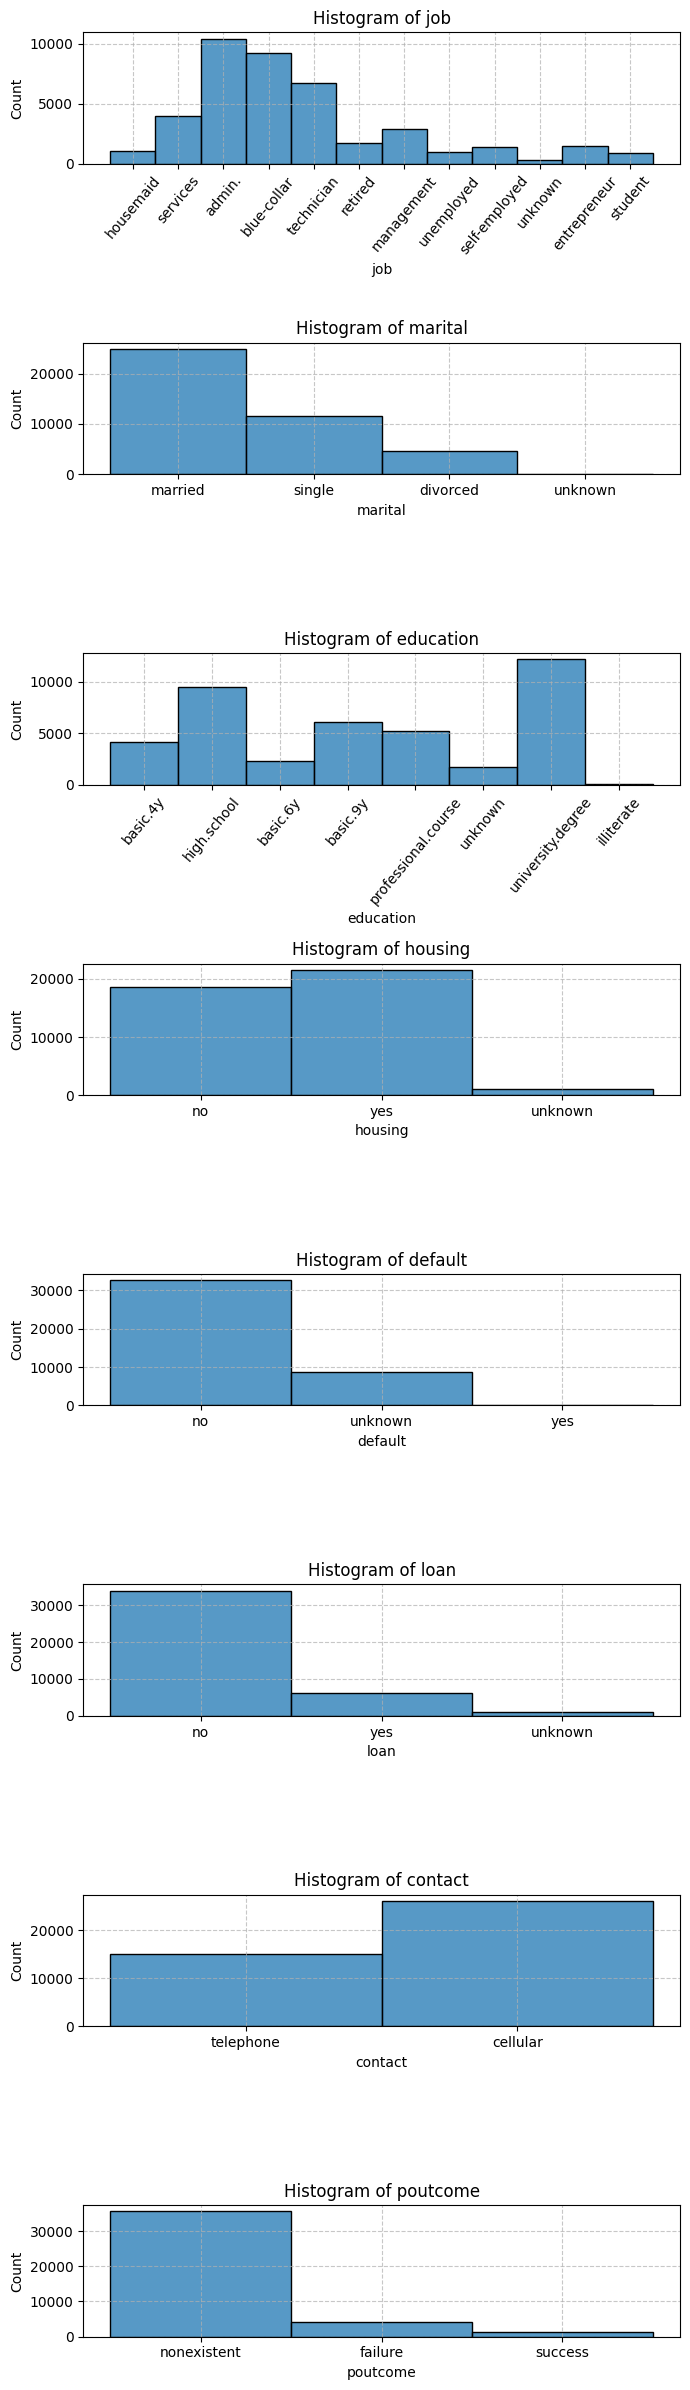

In [26]:
categoricas_variables = ['job', 'marital', 'education', 'housing', 'default', 'loan', 'contact', 'poutcome',]

def plot_categoricas(data_set):

    # Crear la figura con 1 columna y n filas, donde n es el número de variables categóricas.
    fig, axis = plt.subplots(len(categoricas_variables), 1, figsize=(7, len(categoricas_variables) * 3))

    # Iterar sobre cada columna categórica del DataFrame
    for i, col in enumerate(categoricas_variables):
        # Crear histograma para cada columna categórica.
        sns.histplot(ax = axis[i], data = data_set, x = col) 
        axis[i].set_title(f'Histogram of {col}')
        axis[i].grid(linestyle='--', alpha=0.7)
        
        # Rotación automática de las etiquetas del eje X si es necesario.

        category_counts = data_set[col].value_counts() # Contar las categorías en la columna.
        
        if len(category_counts) > 20: # Si hay más de 20 categorías, eliminar las etiquetas del eje X
            axis[i].set_xticklabels([])
        elif len(category_counts) >= 8:
            for label in axis[i].get_xticklabels(): # Si hay más de 10 categorías pero menos de 20, rotar las etiquetas del eje X
                label.set_rotation(50)

    plt.tight_layout()
    plt.show()

plot_categoricas(data_limpia)

- **Job**: Los empleos que mas se repiten entre las personas del data set son: service, blue-collar, technicians y admin. 
- **marital**: En el Titanic había casi el doble de hombres que de mujeres.
- **Pclass**: La suma de los pasajeros que viajaban en primera y segunda clase era casi idéntica a las que viajaban en tercera.
- **Embarked**: La mayoría de los pasajeros del Titanic embarcaron en la estación de Southampton (`S`).
- **SibSp**: Más de 800 pasajeros viajaron solos. Los restantes, con su pareja o alguien más de su familia.
- **Parch**: Casi todos los pasajeros viajaron sin padres o hijos. Una pequeña parte sí lo hizo.


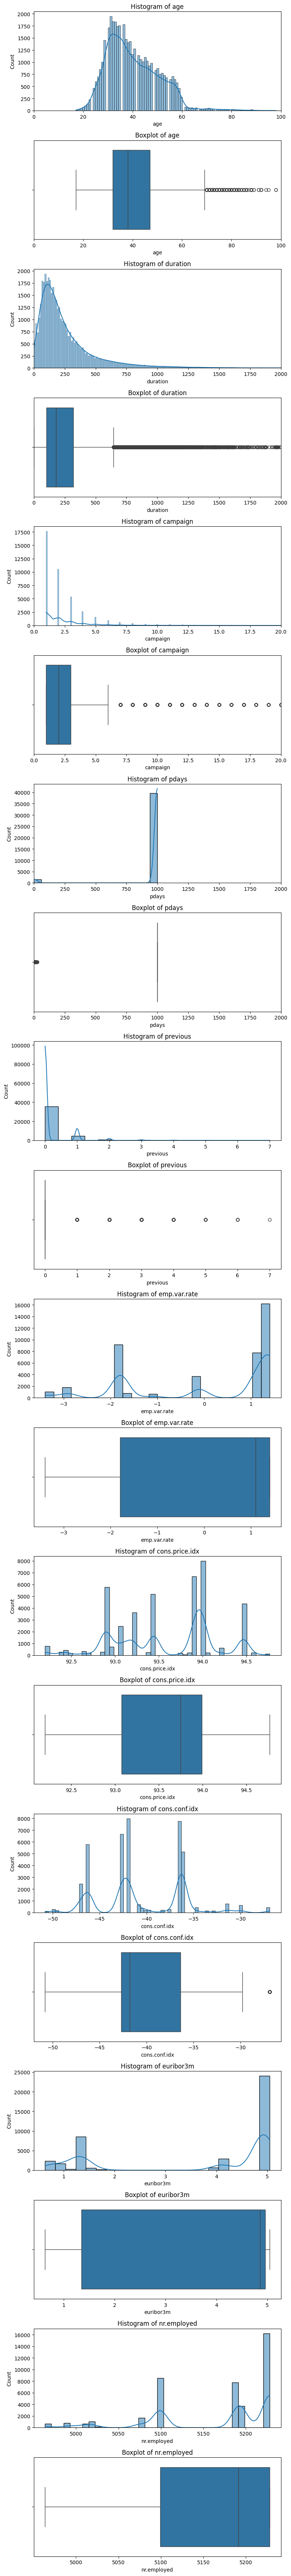

In [37]:
def plot_numericas(data_set):

    numericals_variables = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

    # Crear la figura con 1 columnas y 2 filas por variable.
    fig, axis = plt.subplots(len(numericals_variables) * 2, 1, figsize=(8, len(numericals_variables) * 7))

    # Definir límites de los ejes x para cada par de gráficos (histograma y boxplot).
    # RECORDAR CAMBIAR LOS NOMBRES Y PONER LOS DE LAS COLUMNAS DE DF CORRESPONDIENTE.
    x_limits = {
        'age': (0, 100),   # Rango para el histograma y el boxplot de columna1...
        'duration': (0, 2000),    
        'campaign': (0, 20), 
        'pdays': (0, 2000),
           
        # Añadir más columnas y rangos si es necesario...
    }

    # Iterar sobre cada columna del DataFrame
    for i, col in enumerate(numericals_variables):
        index = i * 2
        # Histograma en la primera fila
        sns.histplot(data = data_set, x = col, kde = True, ax = axis[index])
        axis[index].set_title(f'Histogram of {col}')
        
        # Establecer límites del eje x para el histograma
        if col in x_limits:
            axis[index].set_xlim(x_limits[col])  # Asigna el rango de valores personalizado al histograma

        # Boxplot en la segunda fila
        sns.boxplot(data = data_set, x = col, ax = axis[index + 1])
        axis[index + 1].set_title(f'Boxplot of {col}')
        
        # Establecer límites del eje x para el boxplot (mismo rango que el histograma)
        if col in x_limits:
            axis[index + 1].set_xlim(x_limits[col])  # Asigna el mismo rango de valores al boxplot

    plt.tight_layout()
    plt.show()

plot_numericas(data_limpia)